# Machine Learning (Supervised Learning) Project
# Machine Learning Bootcamp - Palestine Techno Park - July 2019

<img src="https://miro.medium.com/max/875/1*M9le42saJxWlOYyYvhKtPA.jpeg" alt="" title="" />


<div class="alert alert-block alert-info">
<b></b>In this project, we use classification models in machine learning and data science to predict if a person survived or not after the titanic accident according to a data taken from Kaggle.
</div>

## Looking at the big picture and getting the data.

In [362]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [363]:
#We use train data to train the model. This data includes the results (if the person survives or not).
train=pd.read_csv('Desktop/train.csv')

#We use test data to test the model. This data does not include the results (if the person survives or not)
#so we have to combine it with the result data.
test=pd.read_csv('Desktop/test.csv')
result=pd.read_csv('Desktop/gender_submission.csv')

In [364]:
#Combining the tested data with the result.
test['Survived']=result['Survived']

In [365]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [366]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [367]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [368]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
Survived       418 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


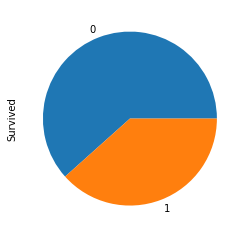

In [369]:
#Plotting a pie chart for the two classes ( survived or not) for the train data.
train['Survived'].value_counts().plot.pie()

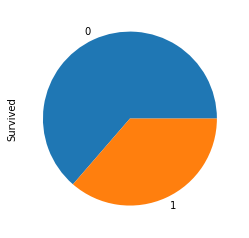

In [370]:
#Plotting a pie chart for the two classes ( survived or not) for the test data.
test['Survived'].value_counts().plot.pie()

## Cleaning data.

In [371]:
#We drop the columns ('PassengerId','Name','Ticket','Cabin') because they don't affect on the prediction process.
train=train.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
test=test.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)

In [372]:
#To check the percantage of the missing data in the train data. 
train.isnull().sum()/test.shape[0]

Survived    0.000000
Pclass      0.000000
Sex         0.000000
Age         0.423445
SibSp       0.000000
Parch       0.000000
Fare        0.000000
Embarked    0.004785
dtype: float64

In [373]:
# To check the percantage of the missing data in the test data.
test.isnull().sum()/test.shape[0]

Pclass      0.000000
Sex         0.000000
Age         0.205742
SibSp       0.000000
Parch       0.000000
Fare        0.002392
Embarked    0.000000
Survived    0.000000
dtype: float64

In [374]:
# Check if there is a missing data.
train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [375]:
# Check if there is a missing data.
test.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
Survived     0
dtype: int64

In [376]:
#Deleting the records that have missing data.
train=train.dropna(axis=0)
test=test.dropna(axis=0)

In [377]:
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [378]:
test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Survived    0
dtype: int64

## Preparing the data for the models.

<img src="/C:/Users/Imad.xps/Pictures/a.png" alt="" title="" />

### The data should be split like this:

<img src="a.PNG" alt="">


### Splitting the results.

In [379]:
#Splitting the survived column ( the results ).
survived_train=train['Survived']
train=train.drop(['Survived'],axis=1)
survived_test=test['Survived']
test=test.drop(['Survived'],axis=1)

In [380]:
train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [381]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [382]:
survived_test.head()

0    0
1    1
2    0
3    0
4    1
Name: Survived, dtype: int64

In [383]:
survived_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

### Encoding the categories columns.

In [408]:
encoded_train=pd.get_dummies(train,columns=['Embarked','Sex','Pclass'])
encoded_test=pd.get_dummies(test,columns=['Embarked','Sex','Pclass'])

In [409]:
encoded_train.head()

,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,35.0,1,0,53.1000,0,0,1,1,0,1,0,0
4,35.0,0,0,8.0500,0,0,1,0,1,0,0,1


In [410]:
encoded_test.head()

,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,34.5,0,0,7.8292,0,1,0,0,1,0,0,1
1,47.0,1,0,7.0000,0,0,1,1,0,0,0,1
2,62.0,0,0,9.6875,0,1,0,0,1,0,1,0
3,27.0,0,0,8.6625,0,0,1,0,1,0,0,1
4,22.0,1,1,12.2875,0,0,1,1,0,0,0,1


## Using the classification models for prediction.

### Logistic Regression.

In [411]:
from sklearn.linear_model import LogisticRegression

In [412]:
#Making the machine for prediction.
clf=LogisticRegression()

In [413]:
#Training the machine.
clf.fit(encoded_train,survived_train)

C:\Users\Imad.xps\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [414]:
#The prediction accuracy of the machine for the train data.
clf.score(encoded_train,survived_train)

0.8019662921348315

In [415]:
#The prediction accuracy of the machine for the test data.
clf.score(encoded_test,survived_test)

0.9063444108761329

### Using the machine to predict if a person survived or not.

In [416]:
#The real result
survived_test.iloc[10]

0

In [417]:
#The predicted result
clf.predict((encoded_test[10:11]))

array([0], dtype=int64)

### K-Nearest Neighbours.

In [418]:
from sklearn.neighbors import KNeighborsClassifier

In [471]:
#Making the machine for prediction.
knn = KNeighborsClassifier(n_neighbors=1,leaf_size=1000, p=30)

In [472]:
#Training the machine.
knn.fit(encoded_train,survived_train)

KNeighborsClassifier(algorithm='auto', leaf_size=1000, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=30,
           weights='uniform')

In [473]:
#The prediction accuracy of the machine for the train data.
knn.score(encoded_train,survived_train)

0.9845505617977528

In [474]:
#The prediction accuracy of the machine for the test data.
knn.score(encoded_test,survived_test)

0.6072507552870091

### Using the machine to predict if a person survived or not.

In [423]:
#The real result
survived_test.iloc[1]

1

In [424]:
#The predicted result
knn.predict((encoded_test[1:2]))

array([0], dtype=int64)

### Random Forest.

In [425]:
from sklearn.ensemble import RandomForestClassifier

In [426]:
#Making the machine for prediction.
clf1 = RandomForestClassifier(n_estimators=1000, max_depth=100,random_state=0)

In [427]:
#Training the machine.
clf1.fit(encoded_train,survived_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=100, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [428]:
#The prediction accuracy of the machine for the train data.
clf1.score(encoded_train,survived_train)

0.9859550561797753

In [429]:
#The prediction accuracy of the machine for the test data.
clf1.score(encoded_test,survived_test)

0.8036253776435045

### Using the machine to predict if a person survived or not.

In [430]:
#The real result
survived_test.iloc[11]

1

In [431]:
#The predicted result
clf1.predict((encoded_test[11:12]))

array([1], dtype=int64)